In [62]:
# import mel spectra
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra


In [49]:
import pandas as pd

import os
import sys
import glob

def get_files(base_folder,SNR,machine,ID):
    
    fn = dict()
    fa = dict()
    
    for idx in ID:
        
        fn[idx] = sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=base_folder+'dataset',SNR=SNR,machine=machine,ID=idx, n='normal',ext='wav' ))))
    
        fa[idx] = sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=base_folder+'dataset',SNR=SNR,machine=machine,ID=idx, n='abnormal',ext='wav' ))))
    
    return fn, fa

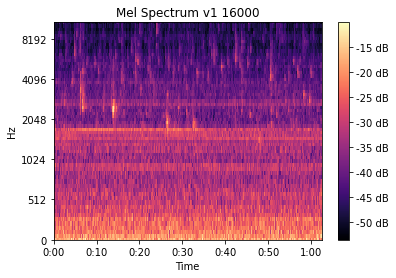

16000
v1


(124928,)

In [39]:
# example to tune paramters
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
fe_mel = feature_extractor_mel(BASE_FOLDER,'v1')
fe_mel.set_hyperparamter(n_fft=1024, n_mels=64, hop_length=82)
fe_mel.create_from_wav(file_path,0)
fe_mel.plot()

plt.show()
print(fe_mel.para_dict['wave_srate'])
print(fe_mel.name)
fe_mel.flat_feature().shape

In [78]:
#fe_mel_master is taken for getting the paramters as used for 
# target_folder is from base folder werher to store the feature extractor pkl
# tuning by eye
def MEL_to_Pandas(base_folder,target_folder,fe_mel_master,
                  FileFindDict={'SNR': '6dB',
                                'machine': 'pump', 
                                'ID': ['00']},
                  FileCountlimit=None,verbose=True):
    
    nf, af = get_files(base_folder,
                       FileFindDict['SNR'],
                       FileFindDict['machine'],
                       FileFindDict['ID'])    
    # limit the File count
    for idx in nf:
        if FileCountlimit:
            if FileCountlimit < len(nf[idx]):
                nf[idx] = nf[idx][:FileCountlimit]
            if FileCountlimit < len(af[idx]):
                af[idx] = af[idx][:FileCountlimit]
                
    real_base_folder = os.path.abspath(base_folder)
    df = pd.DataFrame(columns=['path','abnormal','ID'])
    
    get_filename = lambda l: [os.path.basename(pl).replace('.'+'wav','') for pl in l]
        
    for idx in nf:
        df_temp_n = pd.DataFrame()
        df_temp_n['path'] = nf[idx]
        df_temp_n['file'] = get_filename(nf[idx])
        df_temp_n['abnormal'] = 0
        df_temp_n['ID'] = idx
        df_temp_a = pd.DataFrame()
        df_temp_a['path'] = af[idx]
        df_temp_a['file'] = get_filename(af[idx])
        df_temp_a['abnormal'] = 1
        df_temp_a['ID'] = idx
        df = df.append(df_temp_n, ignore_index = True) 
        df = df.append(df_temp_a, ignore_index = True) 
    
    df['machine'] = FileFindDict['machine']
    df['SNR'] = FileFindDict['SNR']
    
    #df[f'MEL_f_{fe_mel_master.name}']
    target_folder_full = real_base_folder = \
    os.path.abspath(real_base_folder + target_folder)
    
    target_file_prefix = f"MEL_{fe_mel_master.name}_{fe_mel_master.para_dict['hyperpara']['n_mels']}_"
    
    for i in df.index:
        file_path = df.iloc[i]['path']
        if verbose:
            print(file_path)
        fe_mel = feature_extractor_mel(base_folder)
        fe_mel.set_hyperparamter_from_fe(fe_mel_master)
        fe_mel.create_from_wav(file_path)
        file_name = target_file_prefix + \
                    df.iloc[i]['SNR']  + \
                    df.iloc[i]['machine'] + \
                    df.iloc[i]['ID'] + '_abn' +\
                    str(df.iloc[i]['abnormal']) + '_' +\
                    df.iloc[i]['file']+ '.pkl'
                    
        fe_mel.save_to_file(os.path.abspath(target_folder_full+'/' + file_name))
        df.at[i,f'MEL_f_{fe_mel_master.name}'] = target_folder + '\\' + file_name   
    
    get_relpath = lambda pl: os.path.join(pl.replace(real_base_folder, ''))
    df['path'] = df['path'].apply(get_relpath)
    return df

In [ ]:
FileFindDict={'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}
mp = MEL_to_Pandas(BASE_FOLDER,
              r'\dataset\MEL_to_Pandas',
              fe_mel, 
              FileFindDict=FileFindDict,
              FileCountlimit=None,
              verbose=True)


A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000000.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000001.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000002.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000003.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000004.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000005.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000006.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000007.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000008.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000009.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000010.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000011.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000012.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000013.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000116.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000117.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000118.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000119.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000120.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000121.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000122.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000123.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000124.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000125.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000126.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000127.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000128.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000129.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000232.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000233.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000234.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000235.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000236.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000237.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000238.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000239.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000240.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000241.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000242.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000243.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000244.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000245.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000348.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000349.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000350.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000351.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000352.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000353.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000354.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000355.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000356.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000357.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000358.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000359.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000360.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000361.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000464.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000465.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000466.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000467.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000468.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000469.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000470.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000471.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000472.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000473.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000474.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000475.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000476.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000477.wav
A:\Dev

A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000580.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000581.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000582.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000583.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000584.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000585.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000586.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000587.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000588.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000589.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000590.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000591.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000592.wav
A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000593.wav
A:\Dev

In [76]:
mp.MEL_f_v1.iloc[1]

'\\dataset\\MEL_to_Pandas\\MEL_v1_64_6dBpump00_abn1_00000000'